In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\Sales.csv"

df_Sales= pd.read_csv(archivotemp)

In [6]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\Brands.csv"

df_Brands= pd.read_csv(archivotemp)

In [8]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\Stores.csv"

df_Stores= pd.read_csv(archivotemp)

In [9]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\Inventories.csv"

df_Inventories= pd.read_csv(archivotemp)

In [10]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\InventoriesFinal.csv"

df_InventoriesFinal= pd.read_csv(archivotemp)

In [11]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\InventoriesInitial.csv"

df_InventoriesInitial= pd.read_csv(archivotemp)

In [12]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\InvoicePurchases.csv"

df_InvoicePurchases= pd.read_csv(archivotemp)

In [13]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\InvoicePurchasesDetails.csv"

df_InvoicePurchasesDetails= pd.read_csv(archivotemp)

In [15]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\Vendor.csv"

df_Vendors= pd.read_csv(archivotemp)

Stores por City


In [24]:
Cities = df_Stores[['City']].drop_duplicates()
CantidadCiudades = Cities.shape[0]
print(f'Cantidad de ciudades: {CantidadCiudades}')
print(Cities)

Cantidad de ciudades: 68
            City
0   HARDERSFIELD
1       ASHBORNE
2        HORNSEY
3     EANVERNESS
4         SUTTON
..           ...
74     BARNCOMBE
76      TAMWORTH
77     EASTHAVEN
78     BALLYMENA
79      PEMBROKE

[68 rows x 1 columns]


In [35]:
CantidadStores = df_Stores.shape[0]
print(CantidadStores)

80


In [26]:
sns.set(style="whitegrid")


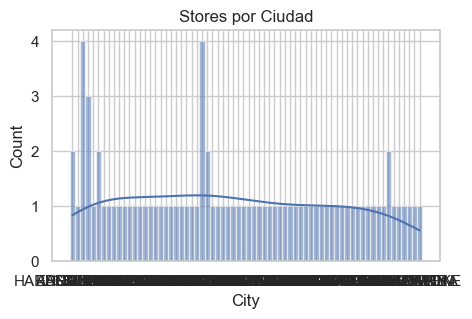

In [28]:
fig, ax = plt.subplots(figsize=(5,3))
sns.histplot(data=df_Stores,x= 'City', kde=True, discrete = True)
plt.title('Stores por Ciudad')
plt.show()

En casi todas las ciudades tiene un solo Store

In [31]:
StoreCount = df_Stores['City'].value_counts().reset_index()
print(StoreCount)

            City  count
0        HORNSEY      4
1      MOUNTMEND      4
2     EANVERNESS      3
3   HARDERSFIELD      2
4       LARNWICK      2
..           ...    ...
63     BARNCOMBE      1
64      TAMWORTH      1
65     EASTHAVEN      1
66     BALLYMENA      1
67      PEMBROKE      1

[68 rows x 2 columns]


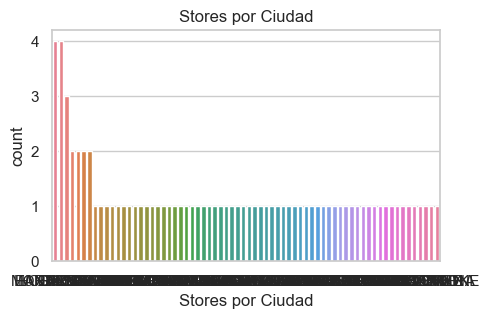

In [32]:
fig, ax = plt.subplots(figsize=(5,3))
sns.barplot(data=StoreCount,x='City',y= 'count', ax=ax, hue='City')
plt.title('Stores por Ciudad')
plt.xlabel('Stores por Ciudad')
plt.show()

In [33]:
MasDeUnStore = StoreCount[StoreCount['count']>1]
print(MasDeUnStore)


           City  count
0       HORNSEY      4
1     MOUNTMEND      4
2    EANVERNESS      3
3  HARDERSFIELD      2
4      LARNWICK      2
5     GOULCREST      2
6     DONCASTER      2


De 68 ciudades solo 6 tienen mas de un store

In [37]:
print(df_Brands.head(20))

    Brand                  Description   Price    Size  Volume  \
0      58  Gekkeikan Black & Gold Sake   12.99   750mL   750.0   
1      62     Herradura Silver Tequila   36.99   750mL   750.0   
2      63   Herradura Reposado Tequila   38.99   750mL   750.0   
3      72         No. 3 London Dry Gin   34.99   750mL   750.0   
4      75    Three Olives Tomato Vodka   14.99   750mL   750.0   
5      77  Three Olives Espresso Vodka   12.99   750mL   750.0   
6      79     Three Olives Loopy Vodka   14.99   750mL   750.0   
7     115              Belvedere Vodka   27.99  1000mL  1000.0   
8     126             Grey Goose Vodka   32.99  1000mL  1000.0   
9     168      Three Olives Strawberry   12.99   750mL   750.0   
10    171               Gentleman Jack   49.99  1750mL  1750.0   
11    173        Hornitos Reposado VAP   22.99   750mL   750.0   
12    175           1800 Anejo Tequila   36.99   750mL   750.0   
13    178    Wild Turkey Russell's RSV   29.99   750mL   750.0   
14    192 

In [68]:
CantxTipo = df_Brands.groupby(['Classification'])['Brand'].count().reset_index()
print(CantxTipo)

   Classification  Brand
0               1   3567
1               2   8693


In [62]:
Sales_Classification = pd.merge(df_Sales,df_Brands,how='left',on = 'Brand')[['Classification','SalesDollars']]
print(Sales_Classification.head(5))


   Classification  SalesDollars
0               1         16.49
1               1         32.98
2               1         16.49
3               1         14.49
4               1         69.98


In [73]:
VentasporTipo=Sales_Classification.groupby(['Classification'])['SalesDollars'].sum().reset_index()
print(VentasporTipo)

   Classification  SalesDollars
0               1   20550829.07
1               2   12588546.22


In [75]:
VentasporTipo = pd.merge(VentasporTipo,CantxTipo,how= 'left', on = 'Classification')
print(VentasporTipo)


   Classification  SalesDollars  Brand
0               1   20550829.07   3567
1               2   12588546.22   8693


In [103]:
label = VentasporTipo['Classification']
sizes1 = VentasporTipo['SalesDollars']
sizes2 = VentasporTipo['Brand']
newlabel = ['Licores','Vinos']

In [106]:
print(type(label))
print(newlabel)

<class 'pandas.core.series.Series'>
['Licores', 'Vinos']


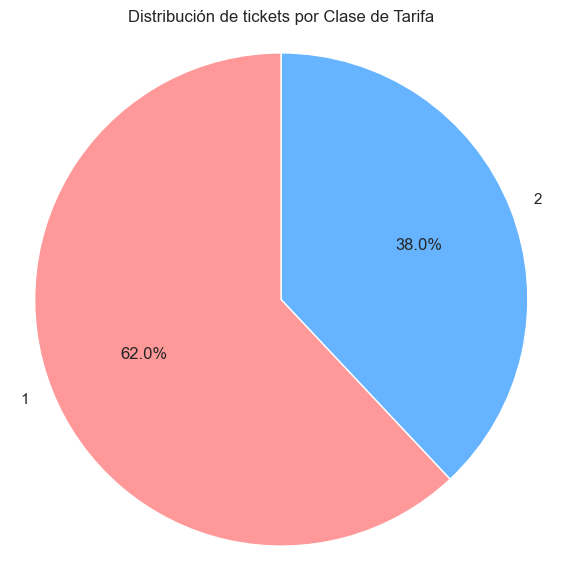

In [94]:


plt.figure(figsize=(7, 7))  
plt.pie(sizes1, labels=label, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])

plt.axis('equal')# Asegurar que el gráfico sea circular

plt.title('Distribución de tickets por Clase de Tarifa')
plt.show()

tuple

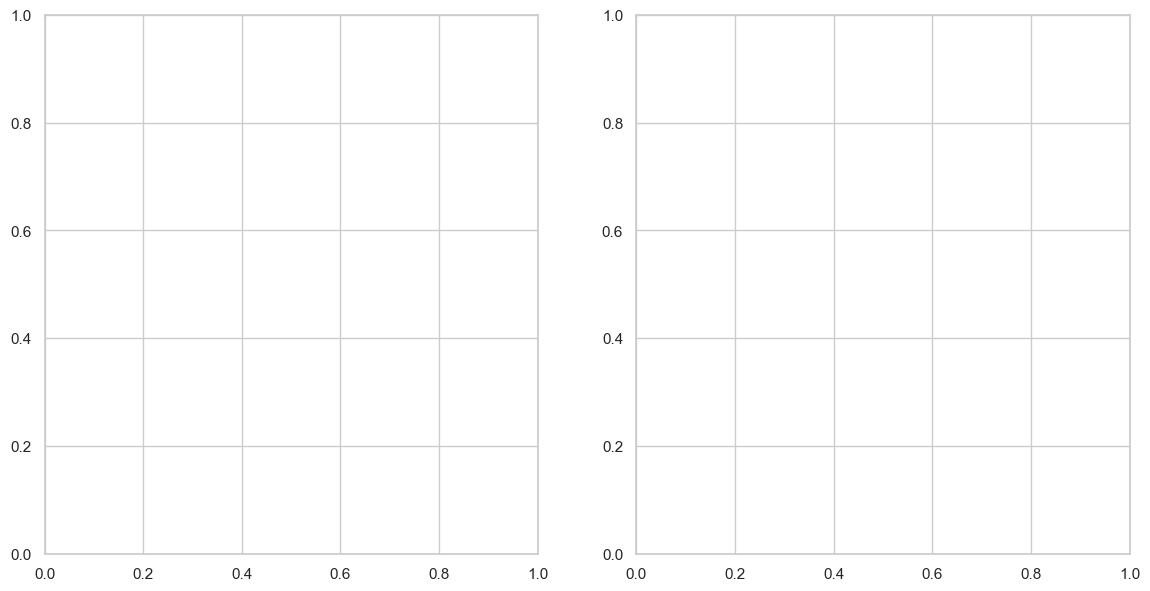

In [82]:
type(plt.subplots(1, 2, figsize=(14, 7)))

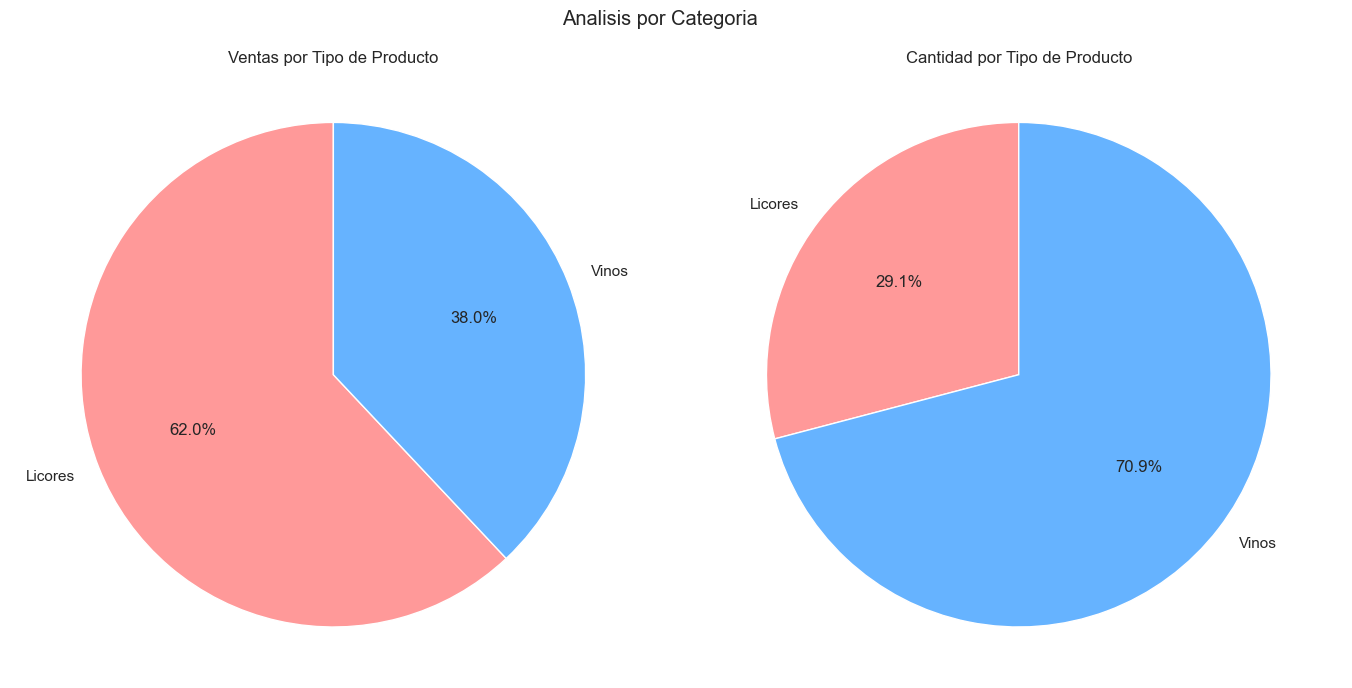

In [110]:
# Crear la figura con dos subplots (uno para cada gráfico de torta)
# desempaqueto la tupla, para tener los objetos fig, ax1 y ax2 y aplicar
# los metodos de graficos que tienen estos objetos(de la clase Axes)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Creo los graficos, y tambien desempaqueto la infromacion que necesito para poner leyenda a los graficos
wedges1, texts1, autotexts1 = ax1.pie(sizes1,labels=newlabel,autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
ax1.set_title('Ventas por Tipo de Producto')
ax1.axis('equal')
#ax1.legend(wedges1, newlabel, title="Clasificación", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

wedges2, texts2, autotexts2 = ax2.pie(sizes2,labels=newlabel,autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
ax2.set_title('Cantidad por Tipo de Producto')
ax2.axis('equal')
#ax2.legend(wedges2, newlabel, title="Clasificación", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


fig.suptitle('Analisis por Categoria')
fig.tight_layout()

plt.show()

Los productos 1, los licores, representan la mayor cantidad de Ventas , sin embargo no en unidadea, claramente son porducts mas caros.

In [101]:
df_Brands[df_Brands['Classification']==2]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber
57,605,Alate Kosher Wine,16.99,750mL,750.0,2,9.67,10754
58,607,Schmitt Sohne Funf Rsl,8.49,750mL,750.0,2,5.74,9552
69,753,LaBelle Winery Blueberry,19.99,750mL,750.0,2,13.79,90032
95,870,Carpano Antica Formula,29.99,1000mL,1000.0,2,17.64,9165
1064,4491,Calvados Marquis De St Loup,27.99,750mL,750.0,2,19.04,9165
...,...,...,...,...,...,...,...,...
12255,44917,Ferreira 10-Yr Tawny Port,24.99,750mL,750.0,2,16.55,90024
12256,44944,Sanford Santa Rita Pnt Nr,22.99,750mL,750.0,2,14.93,4425
12257,45016,Neal One Lane Bridg Cab Svgn,93.99,750mL,750.0,2,61.43,10754
12258,46011,Folonari Pnt Nr Venezie,12.99,1500ml,1500.0,2,8.90,9744
